# <center> Employee Productivity and Satisfaction HR Data

<center>Explore and do a sensitivity analysis that would give impact in employee performance and satisfaction

![](HRS.jpg)

### `About the Data`

This dataset was created to explore the diverse factors impacting employee performance and satisfaction in a typical organization. It spans a variety of fields from personal demographics to performance metrics and job details, offering a comprehensive view into the dynamics of the workplace.
The inspiration behind the creation of this dataset is to provide an accessible resource for those interested in the field of HR analytics. It can be used to derive insights into employee performance, satisfaction, and overall engagement at work. This dataset is particularly useful for tasks such as predicting employee turnover, analyzing employee performance, and understanding the factors that influence job satisfaction.

This comprehensive dataset, "Employee Performance and Satisfaction Metrics Dataset", provides a holistic view of the workforce in an organization. It comprises various employee attributes, performance metrics, and job characteristics, enabling a wide range of analyses in the realm of Human Resources.

#### Attribute Information
1) Name: Full name of employee
2) Age: age of employee
3) Gender: gender of employee
4) Projects Completed: no. of projects completed out of 25
5) Productivity(%): productivity score out of 100
6) Satisfaction Rate(%): satisfaction rate out of 100
7) Feedback Score: feedback score out of 5
8) Department: department in which the employee works in
9) Position: position of employee within organization
10) Joining Date: The date when the employee joined the company, in MM-YYYY format
11) Salary: employee salary

Group Members:</br>
`Christian Jay Baguio` </br>
`Alliana Eli U. Baybay`</br>
`Jan Carlo Galinato`</br>
`Franco Roa`</br>

Data source link: https://www.kaggle.com/datasets/adityaab1407/employee-productivity-and-satisfaction-hr-data

## `🔃 Import Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from sklearn import metrics
import plotly.express as px

In [2]:
df = pd.read_csv('hr_dashboard_data.csv')
df

Name  Age  Gender  Projects Completed  Productivity (%)  \
0      Douglas Lindsey   25    Male                  11                57   
1     Anthony Roberson   59  Female                  19                55   
2        Thomas Miller   30    Male                   8                87   
3         Joshua Lewis   26  Female                   1                53   
4     Stephanie Bailey   43    Male                  14                 3   
..                 ...  ...     ...                 ...               ...   
195   Stephanie Fisher   29  Female                   9                32   
196      Jeremy Miller   26    Male                   7                45   
197      Daniel Pierce   22    Male                   3                36   
198  Michael Hernandez   36  Female                  23                96   
199   Victor Gutierrez   43    Male                  10                86   

     Satisfaction Rate (%)  Feedback Score Department          Position  \
0                       25             4.7  Marketing           Analyst   
1                       76             2.8         IT           Manager   
2                       10             2.4         IT           Analyst   
3                        4             1.4  Marketing            Intern   
4                        9             4.5         IT         Team Lead   
..                     ...             ...        ...               ...   
195                     87             3.5         HR  Junior Developer   
196                     28             2.8         IT  Junior Developer   
197                     77             1.6    Finance            Intern   
198                     50             3.4  Marketing           Manager   
199                     71             2.0         IT         Team Lead   

    Joining Date  Salary  
0         Jan-20   63596  
1         Jan-99  112540  
2         Jan-17   66292  
3         Jan-22   38303  
4         Jan-05  101133  
..           ...     ...  
195       Jan-19   50051  
196       Jan-21   46612  
197       Jan-21   32992  
198       Jan-05  104216  
199       Jan-14  104341  

[200 rows x 11 columns]

In [30]:
df.drop(["Name"], axis = 1, inplace = True)
df

Age  Gender  Projects Completed  Productivity (%)  Satisfaction Rate (%)  \
0     25    Male                  11                57                     25   
1     59  Female                  19                55                     76   
2     30    Male                   8                87                     10   
3     26  Female                   1                53                      4   
4     43    Male                  14                 3                      9   
..   ...     ...                 ...               ...                    ...   
195   29  Female                   9                32                     87   
196   26    Male                   7                45                     28   
197   22    Male                   3                36                     77   
198   36  Female                  23                96                     50   
199   43    Male                  10                86                     71   

     Feedback Score Department          Position Joining Date  Salary  
0               4.7  Marketing           Analyst       Jan-20   63596  
1               2.8         IT           Manager       Jan-99  112540  
2               2.4         IT           Analyst       Jan-17   66292  
3               1.4  Marketing            Intern       Jan-22   38303  
4               4.5         IT         Team Lead       Jan-05  101133  
..              ...        ...               ...          ...     ...  
195             3.5         HR  Junior Developer       Jan-19   50051  
196             2.8         IT  Junior Developer       Jan-21   46612  
197             1.6    Finance            Intern       Jan-21   32992  
198             3.4  Marketing           Manager       Jan-05  104216  
199             2.0         IT         Team Lead       Jan-14  104341  

[200 rows x 10 columns]

### `Data Preprocessing`

In [8]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    200 non-null    int64  
 1   Gender                 200 non-null    object 
 2   Projects Completed     200 non-null    int64  
 3   Productivity (%)       200 non-null    int64  
 4   Satisfaction Rate (%)  200 non-null    int64  
 5   Feedback Score         200 non-null    float64
 6   Department             200 non-null    object 
 7   Position               200 non-null    object 
 8   Joining Date           200 non-null    object 
 9   Salary                 200 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 15.8+ KB


In [9]:
#checking null values
df.isnull().sum()

Age                      0
Gender                   0
Projects Completed       0
Productivity (%)         0
Satisfaction Rate (%)    0
Feedback Score           0
Department               0
Position                 0
Joining Date             0
Salary                   0
dtype: int64

In [10]:
#checking duplicated values
print(df.duplicated().value_counts())

False    200
dtype: int64


## `🔎 Examine Dataset (EDA) `

### 🔎 Feature Understanding 

Text(0, 0.5, 'Feedback Score')

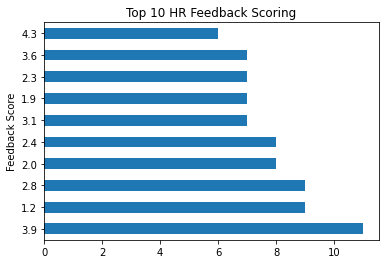

In [11]:
ax = df["Feedback Score"].value_counts().head(10).plot(kind = "barh", title ="Top 10 HR Feedback Scoring")
ax.set_ylabel('Feedback Score')

Text(0.5, 0, 'Project Counts')

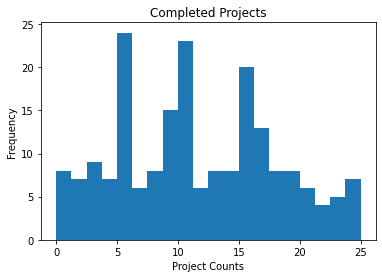

In [12]:
ax = df["Projects Completed"].plot(kind = "hist", bins = 20, title = "Completed Projects")
ax.set_xlabel("Project Counts")

Text(0.5, 0, 'Project Counts')

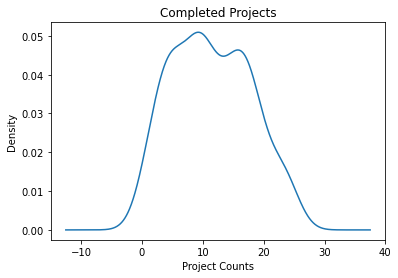

In [13]:
ax = df["Projects Completed"].plot(kind = "kde", title = "Completed Projects")
ax.set_xlabel("Project Counts")

### Performing Scatter plot

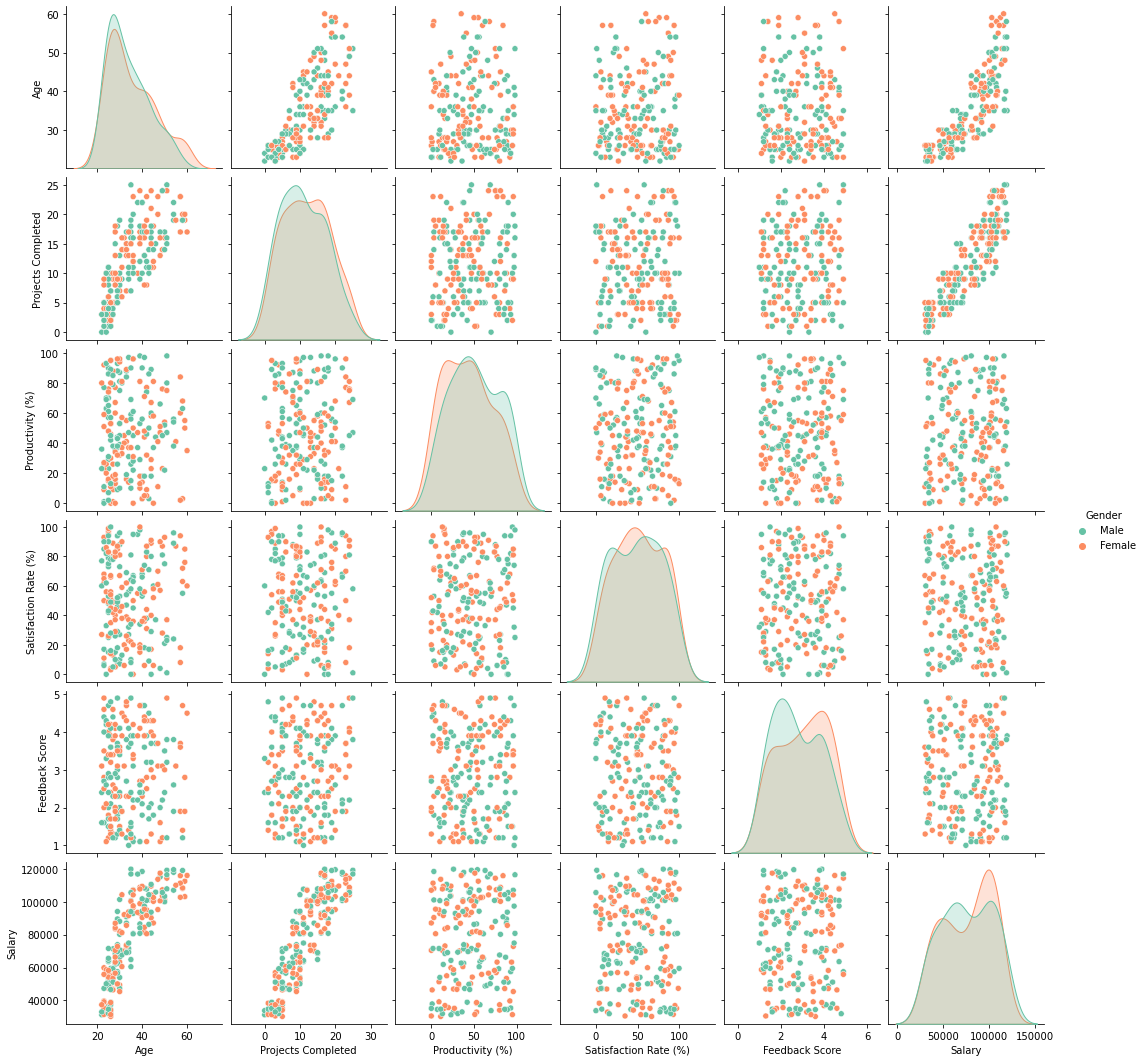

In [14]:
colors = "Set2" # Define a palette (colors)
sns.pairplot(df,palette=colors, hue='Gender')

In this graph above, our group decided to conduct a multivariate analysis of the dataset chosen. We use 'Gender' as our data points for the overall analysis. What we can see here is most attributes in the dataset has no correlation with each other. This will be further explained thoroughly as we examine the dataset.  <br>
> For this analysis, we will be using salary as the independent variable.

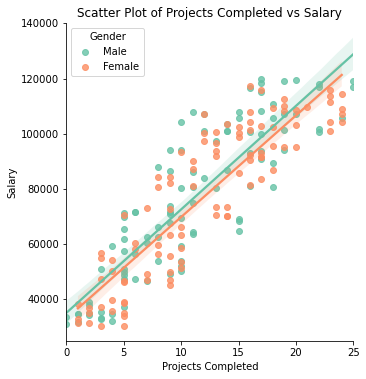

In [15]:
sns.lmplot(data=df, x='Projects Completed',y='Salary',palette=colors, hue='Gender',legend_out=False)
plt.title('Scatter Plot of Projects Completed vs Salary')
plt.show()

Analysis: <br>
> The scatter plot above shows a strong, positive correlation (regression) with the values presented; In simple terms, this proves that there is a good correlation that employees can indeed have a salary increase depending on how many projects they completed. Regardless if they are men or women. To prove this statement, consider the data points in between 15-25 completed projects and $80,000-$120,000 as their salary. In close observation, the data points (which are men and women) are somewhat on par to one another in terms of how much projects can be done, however if we examine closely at the regression, it shows that men have the tendency to have a higher salary rate compared to women. The factors regarding as to why men have higher pay compared to women could be due to occupation choices, etc. <br>
<br>
Nonetheless, the main point of this analysis is not to purely see the relationship between men and women in a workplace, rather the relationship between how the amount of projects done, will increase the salary of the employee, factoring on the employee's choice of occupation (according to the dataset, there are IT. Marketing, Sales, Finance, etc.) hence the gap pay between men and women.

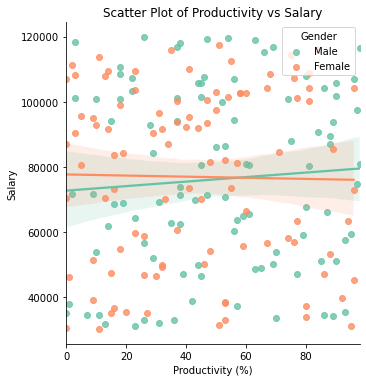

In [16]:
sns.lmplot(data=df, x='Productivity (%)',y='Salary',palette=colors, hue='Gender',legend_out=False)
plt.title('Scatter Plot of Productivity vs Salary')
plt.show()

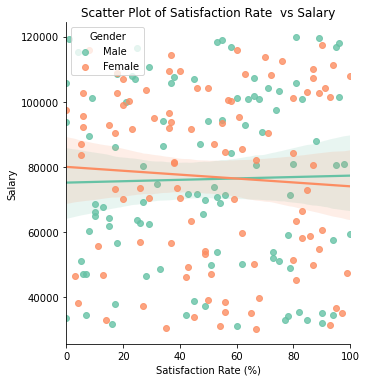

In [17]:
sns.lmplot(data=df, x='Satisfaction Rate (%)',y='Salary',palette=colors, hue='Gender',legend_out=False)
plt.title('Scatter Plot of Satisfaction Rate  vs Salary')
plt.show()

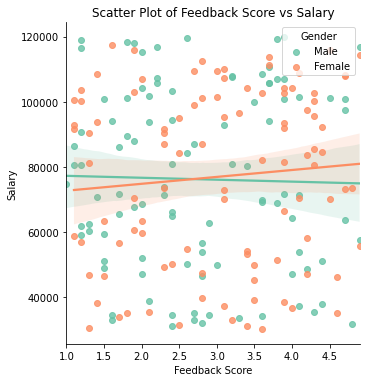

In [18]:
sns.lmplot(data=df, x='Feedback Score',y='Salary',palette=colors, hue='Gender',legend_out=False)
plt.title('Scatter Plot of Feedback Score vs Salary')
plt.show()

Analysis for the three graphs: <br>
The first, second, and third graphs show poor correlation between the values given. Each of the graphs will be explained briefly. <br>
1. The first graph shows the relationship between salary and productivity.
    > For the 'Male' data points, it shows that the correlation is very poor with a slight positive regression while the 'Female' data points show a slight negative regression. Overall, the correlation is poor.
2. The second graph shows the relationship between salary and satisfaction rate
    > For the 'Male' data points, it shows that the correlation is very poor with a slight positive regression while the 'Female' data points show a slight negative correlation. Overall, the correlation is poor.
3. The third graph shows the relationship between salary and feedback rate
    > For the 'Male' data points, it shows that the correlation is very poor with a slight negative regression while the 'Female' data points show a slight positive correlation. Overall, the correlation is poor.

<br>
In perspective of a normal person, logically we would think that productivity, satisfaction, and feedback rate play a large role in increasing the salary of an employee since we would initially think of these things as the primary motivation for employees to have their work noticed by higher ups. However, the data shows that there is no correlation whatsoever between these three values and salary. One of the reasons why this is the case, is due to the fact that it is only a factor that can contribute on completing a project or not. What makes it so, is when we look back to the first graph (about salary and project completion) it shows that what the workplace cared more about is not whether the employee (again, regardless if they are male or female) worked more productively, has a good satisfaction and feedback rate from other employees or higher-ups, it's more about how much the employee was able to contribute to the company by doing and completing those  projects that can boost the company's workflow efficiency to be able to compete with other companies.

<AxesSubplot:>

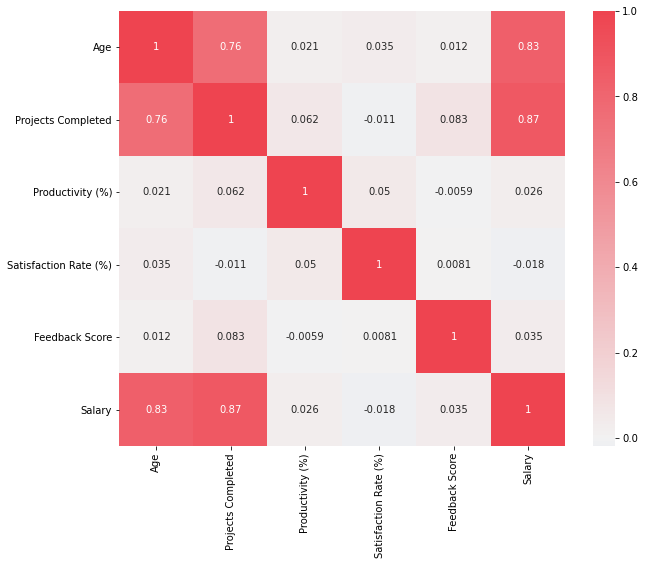

In [19]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(10,8))

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

The graph above is the confusion matrix of the very first graph (pair plot of the dataset) and in here we can see that the one with the highest correlation is between 'salary with projects completed' and 'salary with age'. As for the 'salary with projects completed' it isn't necessary to explain it in depth, but in summary, the relationship between them shows that the amount of projects completed by an employee, will give them a salary increase, without regard if the employee is a man or woman. As for the 'salary with age', there is one assumptions as to why this is a case, and that is because of work experience/domain expertise of the employee. Along with that, employees who are usually older and more experienced in the field, have the tendency to have a higher pay compared to the young employees (since they lack experience in the field).

## `Descriptive Statistics`

Summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [20]:
#performing descriptive analysis
df.describe().T

count       mean           std      min       25%  \
Age                    200.0     34.650      9.797318     22.0     26.00   
Projects Completed     200.0     11.455      6.408849      0.0      6.00   
Productivity (%)       200.0     46.755     28.530068      0.0     23.00   
Satisfaction Rate (%)  200.0     49.935     28.934353      0.0     25.75   
Feedback Score         200.0      2.883      1.123263      1.0      1.90   
Salary                 200.0  76619.245  27082.299202  30231.0  53080.50   

                           50%        75%       max  
Age                       32.0      41.00      60.0  
Projects Completed        11.0      17.00      25.0  
Productivity (%)          45.0      70.00      98.0  
Satisfaction Rate (%)     50.5      75.25     100.0  
Feedback Score             2.8       3.90       4.9  
Salary                 80540.0  101108.25  119895.0

Above, we have a table showing the descriptive analysis of the attributes and its instances of the dataset used. We can see that the count for all of the attributes (columns) are 200, as that is the total number of instances (rows) of the dataset. Let us examine the attributes one by one.
1. Age: <br>
    > The average age of the employees are 35 years old. The standard deviation is at 10. The minimum age are 22 years old while the maximum age is 60 years old. 25% are 26 years old, 50% are 32 years old and 75% are 41 years old.
<br>
2. Projects Completed: <br>
    > The average amount of projects being completed by the employees are 11. The standard deviation is at 6. The minimum amount is 0 while the maximum is at 25 projects completed. 25% is 6, 50% is 11, and 75% is 17 projects completed.
<br>
3. Productivity: <br>
    > The average percentage of productivity among employees is 47%. The standard deviation is at 29%. The minimum is 0 while the maximum productivity is at 98%. 25% of employees rated 23%, 50% of the employees rated 45%, and 75% of the employees rated 70% for their productivity.
<br>
4. Satisfaction Rate: <br>
    > The average satisfaction rate among employees is 50%. The standard deviation is 29%. the minimum is 0 while the maximum satisfaction rate is 100. 25% of the employees rated 26%, 50% of the employees rated 51%, and 75% of the employees rated 75% for their satisfaction amongst each other.
<br>
5. Feedback Score: <br>
    > The average feedback score among employees is 3. The standard deviation is at 1. The minimum 1 while the maximum feedback score is 4.9. 25% scored 2, 50% scored 3, and 75% scored 4.
<br>
6. Salary: <br>
    > The average salary is $76,619. The standard deviation is $27,082. The minimum salary is $30,231 while the maximum salary is $119,895. 25% of the employees have a salary of $53,081, 50% of the employees have a salary of $80,540, and 75% of employees have a salary of $101,108.

In [21]:
#function for checking mean, median, and mode
def m3_proj():
  print('Projects Completed mean: ', df['Projects Completed'].mean())
  print('Projects Completed median: ', df['Projects Completed'].median())
  print('Projects Completed mode: ', df['Projects Completed'].mode())

m3_proj()

Projects Completed mean:  11.455
Projects Completed median:  11.0
Projects Completed mode:  0    5
dtype: int64


The average amount of projects employees were able to complete is 11, which also happens to be the median of the feature (projects completed). The common number of projects completed by employees are either 0 or 5 throughout the whole dataset. 

# 🔎 Question ponder about the data

* What Department has a highest satisfaction rating?
* What Position has a highest Productivity?
* What Position has a highest Salary? 

Text(0.5, 0, 'Satisfaction Rate (%)')

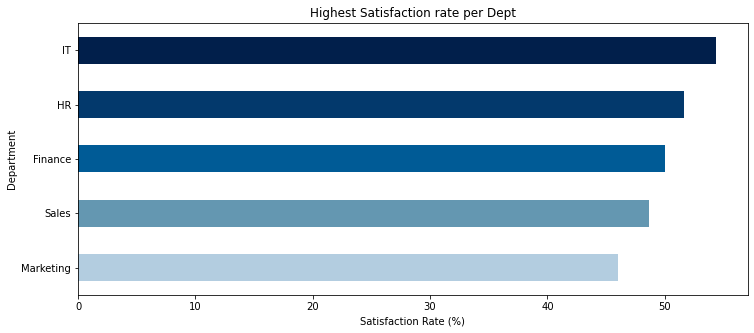

In [22]:
axis = df.query('Department != "Other"').groupby('Department')['Satisfaction Rate (%)'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Highest Satisfaction rate per Dept',
                                        color = ['#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('Satisfaction Rate (%)')

There are 5 departments in the dataset, which are: Marketing, IT, HR, Finance, and Sales.The group have tried analyzing and guessing which department has the highest satisfaction rating, some of us concluded that the department that has the highest satisfaction rating would be the HR, as it is a department that deals with people directly and makes sure that their employees know what they are expected to do in work and regulates how they treat their fellow employees. Suprisingly, the result wasn't what the group anticipated. As it can be seen above, the graph shows a ranking (the top indicating the highest and the bottom as the lowest) where the department with the highest satisfaction rating is IT Department, followed after is HR, then Finance, coming in fourth is Sales, and the last is the Marketing Department.

Text(0.5, 0, 'Productivity (%)')

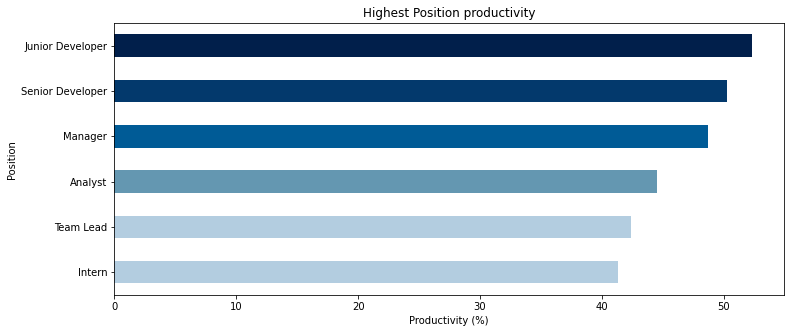

In [23]:
axis = df.query('Position != "Other"').groupby('Position')['Productivity (%)'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Highest Position productivity',
                                   color = ['#b3cde0', '#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('Productivity (%)')

There are 6 positions in each department, being: Junior Developer, Manager, Analyst, Team Lead, Senior Developer, and Intern. The group tried to analyze and guess which position have the highest productivity rate, and the group chose the position Manager. As it is not only a position that is considerably higher but employees who are Managers have to carry the burden of making sure that the sector they are under in is running smoothly, hence as to why the group believed that it was the manager that would have the highest productivity rate. However, the group was proven wrong, as it turns out, the position that has the highest productivity rating first is the Junior Developers, then Senior Developers, coming after that is the Manager, Analyst, Team Lead, and lastly the Intern.

Text(0.5, 0, 'Salary')

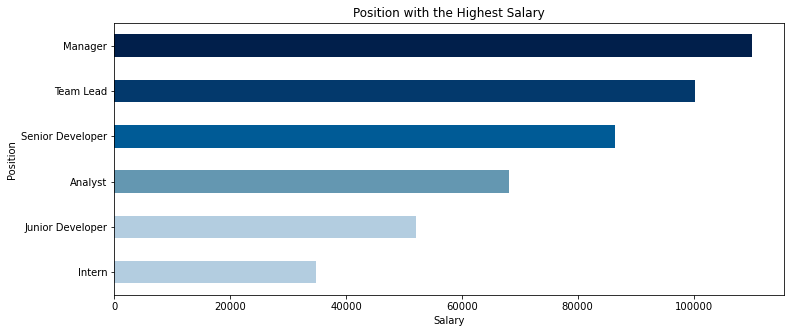

In [24]:
axis = df.query('Position != "Other"').groupby('Position')['Salary'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Position with the Highest Salary',
                                   color = ['#b3cde0', '#b3cde0', '#6497b1', '#005b96', '#03396c', '#011f4b'])
axis.set_xlabel('Salary')

This graph is focused on the Positions and the Salary they received. As anticipated by the group, the position with the highest salary is the Manager, next is the Team Lead, then Senior Developer, Analysis, Junior Developer, and lastly the Intern.

# Model preparation 📈

In [166]:
#Check dataset
df.head(50)

Age  Gender  Projects Completed  Productivity (%)  Satisfaction Rate (%)  \
0    25    Male                  11                57                     25   
1    59  Female                  19                55                     76   
2    30    Male                   8                87                     10   
3    26  Female                   1                53                      4   
4    43    Male                  14                 3                      9   
5    24    Male                   5                63                     33   
6    33  Female                  13                41                     39   
7    23  Female                   4                92                     68   
8    30  Female                   7                32                     43   
9    39  Female                  17                10                     15   
10   36    Male                  11                45                     67   
11   42  Female                  19                 9                     31   
12   25  Female                   2                15                     97   
13   32  Female                  14                45                     20   
14   29    Male                  18                88                      8   
15   40    Male                  17                 3                     53   
16   46    Male                  15                44                     37   
17   41  Female                  13                44                     36   
18   36    Male                  12                22                     66   
19   23    Male                   2                 1                     17   
20   25    Male                  10                29                     73   
21   26  Female                   4                46                     66   
22   27  Female                  10                 9                     80   
23   25  Female                   3                76                     26   
24   40    Male                  22                18                     68   
25   27  Female                   9                26                     13   
26   45  Female                  11                 0                     52   
27   35    Male                  17                26                     81   
28   33    Male                  17                84                     69   
29   26  Female                   7                86                     51   
30   29    Male                   5                93                     94   
31   25  Female                   3                15                     99   
32   26    Male                  10                95                    100   
33   26  Female                   3                 0                     35   
34   34  Female                  13                37                     37   
35   34    Male                   9                47                     56   
36   33    Male                  14                88                     47   
37   58  Female                  19                 3                     72   
38   42  Female                  23                77                     80   
39   44  Female                  11                29                     17   
40   39  Female                  15                18                     20   
41   25    Male                  11                23                     15   
42   44  Female                  15                58                     89   
43   28    Male                   5                14                     15   
44   25    Male                   5                61                     48   
45   29    Male                   5                44                     51   
46   25    Male                   5                90                     75   
47   31  Female                  14                33                     59   
48   33  Female                   7                16                     17   
49  

Text(0.5, 1.0, 'Salary VS Projects Completed')

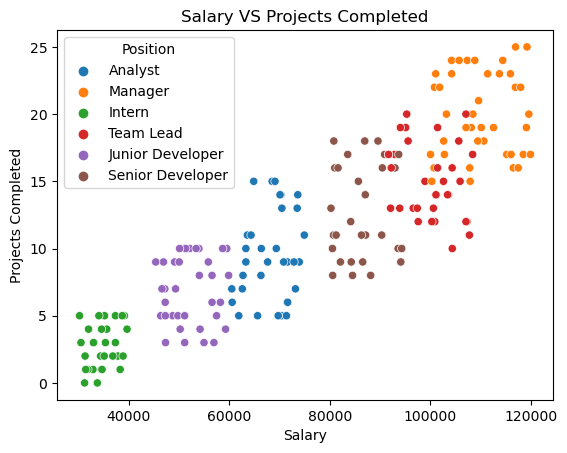

In [4]:
#check for linear connection between salary and projects completed with a hue of position
sns.scatterplot(data=df, x="Salary", y="Projects Completed", hue = 'Position')
plt.title("Salary VS Projects Completed")

In the graph shown above, it is similar to the graph made previously (A scatter plot with completed projects and salary- comparison between men and women in the work environment), the difference only is that it is with positions. Like the other previous plot (Position with the highest salary), it is clearly shown that the Manager has the higher salary compared to other positions, whereas the Intern has the lower salary than the other positions. The order of who has the higher salary is the same as the latter side bar chart (Position with the highest salary). We can also see that salary the employees get is a result of two factors: One would be what position they are working in, and the other would be the amount of projects they completed. To elaborate more clearly; The first factor, shows that the position of the employees can get higher salary, this was proven and shown in this graph and the other graph showing which position has the highest salary. The reason as to why it is so, is due to other factors, such as work experience, their experience of the field they worked on, how well they are able to handle larger tasks, and as well as the number of projects they were able to complete. Now to the second factor, the number or projects completed, we can also see that the amount of projects completed can determine the employee's salary. For example, we can see that the managers have higher salary due to them completing more projects than the other employees. Question: What about the employees who have the similar salary with higher positions? Does amount of projects completed matter more than the position? The answer to that is a no. No, for the reason that the projects completed shows what type of position the employee is from. If you want to check what is the range of projects completed for manager, the minimum to maximum would be estimated from 15-25, and for team lead, it would be around 10-20 projects completed. And from there, the range of the salary would be dependent on what position the employee is from and how many projects they completed.

In [3]:
#check for linear connection between Age, Projects Completed and Salary with hue of Positions
fig = px.scatter_3d(df, x='Age', y='Projects Completed', z = 'Salary', color='Position', title="3D Scatter Plot (Age vs. Projects Completed vs. Salary)")
fig.show()

As we can see here in this graph, we have three features, that is age, salary, and projects completed, including positions as the data points. This graph have a similar nature to the previous graph (the one above this one), but the difference is that we are analyzing this graph with age. It is noticeable that the younger the employee, the likely they are to be in the lower position, which is intern, with the lowest salary. And the older the employee, the likely they are to be in a higher position like a manager, with the highest salary. The reason as to why younger employees have smaller salary is because of two reasons. First, it's because they are new to the company, meaning they are just starting to work, it is expected of them that they should be acquainted with the work they are about to do and their workload isn't expected to be heavy. The second reason is that the projects they completed is not enough to make them be placed directly into a higher position. The project they complete is a condition that can make the employees be promoted to higher positions thus giving them higher pay. 

In [60]:
# Check if there is a high correlation between the chosen column vs salary
def versus_corr():
    correlation = df['Age'].corr(df['Salary'])
    print(f'Correlation between Age and Salary: {correlation:.2f}')

    correlation1 = df['Projects Completed'].corr(df['Salary'])
    print(f'Correlation between Projects Completed and Salary: {correlation1:.2f}')

versus_corr()

Correlation between Age and Salary: 0.83
Correlation between Projects Completed and Salary: 0.87


As we can see here, the correlation between Age and Salary, as well as Projects Completed and Salary being high proves the group's analysis on the scatter plot seen above.

### 📈 Set predictor and the target variables.

* Dependent Variable (Y) is the target or response variable having values like 0 or 1, Yes or No (for binary classification which is the use case for logistic regression)
* Independent Variable (X) is the predictor variable used to predict the target or response variable

In [32]:
#knn target and predictor var
knnX = df[['Projects Completed', 'Salary']]
knny = df['Position']

#linear regression target and predictor var
lin_X = df[['Age', 'Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)', 'Feedback Score']]
lin_y = df['Salary']

#logistic regression target and predictor var
df['Gender'] = df['Gender'].astype('category').cat.codes # 0 = Female, 1 = Male
log_X = df[['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)']]
log_y = df['Gender']

#Decision Tree target and predictor var
df['Position'] = df['Position'].astype('category').cat.codes
df['Department'] = df['Department'].astype('category').cat.codes
deci_X = df.drop(['Gender', 'Joining Date'], axis = 1)
deci_y = df['Gender']

#SVM target and predictor var
X = df[['Salary', 'Projects Completed']].values
y = df['Position'].values

### 📈Feature Scalings

In [33]:
#svm feature scaling
svm_scaler = MinMaxScaler()
svm_scaled = svm_scaler.fit_transform(X)

#Linear and Logistic RegressionFeature Scaling
scaler = StandardScaler()
lin_scaled = scaler.fit_transform(lin_X)
log_scaled = scaler.fit_transform(log_X)

### 📈 Prepare Train and test for Classification model algorithms.

In [34]:
#Train and test preparation for knn
knnX_train, knnX_test, knn_y_train, knn_y_test = tts(knnX, knny, train_size = 0.7, test_size = 0.3, random_state = 32) #set random state to 32
#knn feature scaling
X_train_scaled = scaler.fit_transform(knnX_train)
X_test_scaled = scaler.transform(knnX_test)

#Train and test preparation for logistic
logX_train, logX_test, log_y_train, log_y_test = tts(log_scaled, log_y, train_size = 0.7, test_size = 0.3, random_state = 32) #set random state to 32

#Train and test preparation for Support Vector Machine
X_train, X_test, y_train, y_test = tts(svm_scaled, y, train_size = 0.7, test_size = 0.3, random_state = 32)

### 📈 Prepare Train and test for Regression model algorithm.

In [35]:
linX_train, linX_test, lin_y_train, lin_y_test = tts(lin_scaled, lin_y, train_size = 0.7, test_size = 0.3, random_state=32)

### 📈 Applying Classification algorithms.

In [36]:
#Logistic regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(logX_train, log_y_train)

# creation of model and passing it to a variable and setting the neighbor to 6 since there are 6 positions
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean') #we use the grid search cross val to get the best n_neighbor for this model
knn.fit(X_train_scaled, knn_y_train)# fit the model with data

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [37]:
#Naive Bayes Model
nb_model = GaussianNB() # used for datasets with continuous features that can be assumed to be normally distributed.
nb_model.fit(knnX_train, knn_y_train)

#Decision Tree Model
enc = LabelEncoder()
df_tree = df.apply(enc.fit_transform)

clf = tree.DecisionTreeClassifier(random_state=32, criterion='gini')
clf.fit(deci_X,deci_y)

#Support Vector Machine
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

### 📈 Applying Linear Regression algorithm

In [38]:
reg = LinearRegression().fit(linX_train, lin_y_train)

### 📈 Model Predictions For Classification Models

In [39]:
#Make predictions on the models using test
knn_pred = knn.predict(X_test_scaled)
log_pred = model.predict(logX_test)
tree_pred = clf.predict(deci_X)
nb_pred = nb_model.predict(knnX_test)
svm_pred = svm.predict(X_test)

# Make predictions on the test set
knn_pred_proba = knn.predict_proba(X_test_scaled)
log_pred_proba = model.predict_proba(logX_test)[:, 1]

print(f'knn predictions: \n', knn_pred)
print(f'\nLogistic Reg predictions: \n', log_pred)
print(f'\nGausssian Naive Bayes predictions: \n', nb_pred)
print(f'\nSVM predictions: \n', svm_pred)

knn predictions: 
 ['Intern' 'Senior Developer' 'Manager' 'Junior Developer'
 'Junior Developer' 'Manager' 'Team Lead' 'Senior Developer' 'Manager'
 'Senior Developer' 'Manager' 'Team Lead' 'Senior Developer'
 'Junior Developer' 'Analyst' 'Team Lead' 'Manager' 'Senior Developer'
 'Junior Developer' 'Junior Developer' 'Senior Developer'
 'Junior Developer' 'Junior Developer' 'Senior Developer' 'Analyst'
 'Analyst' 'Junior Developer' 'Junior Developer' 'Senior Developer'
 'Analyst' 'Junior Developer' 'Team Lead' 'Team Lead' 'Intern' 'Manager'
 'Manager' 'Senior Developer' 'Senior Developer' 'Intern' 'Team Lead'
 'Intern' 'Junior Developer' 'Senior Developer' 'Intern' 'Team Lead'
 'Intern' 'Intern' 'Analyst' 'Junior Developer' 'Senior Developer'
 'Team Lead' 'Junior Developer' 'Intern' 'Manager' 'Analyst' 'Team Lead'
 'Team Lead' 'Analyst' 'Junior Developer' 'Manager']

Logistic Reg predictions: 
 [1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 0 0 1 1 1 0 

This is the predictions made by the following models: KNN, Logistic Regression, Naive Bayes, and SVM.

### 📈 Model Predictions For Regression Models

In [40]:
lin_pred = reg.predict(linX_test)

print(f'Linear Reg predictions: \n', lin_pred)

Linear Reg predictions: 
 [ 42783.40055202  98253.50810098 105449.72814021  67912.24838122
  54169.68022459  96033.9216685  102521.76233324  85873.15664527
 110074.21349972  84755.25491059  89528.8795817   95465.94604648
  86930.20785373  44618.36521212  61872.02416893  84871.96473278
 114928.63672713  87136.16339236  47277.15977383  58852.92235257
  88343.25285743  48167.93578314  48373.60086114  94186.66037735
  49420.98332384  84948.82133526  55987.59973347  59891.35086947
  64362.69582057  72568.23526638  46930.13603867  79473.99904926
  81828.67996951  37329.28950086 123411.91935419 103264.58845003
  78473.56015592  82788.80939422  50420.5672932   79527.54963813
  41285.3917311   48469.10070759  70740.70174993  41653.5913843
  80814.07321046  41817.84455482  48010.56352585  63925.49111823
  46581.2345366   84241.17600998 100204.27679839  64412.84458316
  48503.18214727  81323.43623336  61673.90210505 123730.24680302
  95158.17916603  73445.39794965  45340.9161675  103584.44007391]

This is the result of the linear regression model predicting values (instances).

### 📈 Visualize Model Prediction

In [41]:
plt.figure(figsize=(100,100))
tree.plot_tree(clf, filled=True, feature_names = list(df_tree.drop(['Gender', 'Joining Date'], axis = 1)), class_names=['Male', 'Female']);

decision tree (grow, pls ;-;)

### 📈Calculate ROC-AUC score

In [43]:
fpr, tpr, thresholds = roc_curve(log_y_test, log_pred)
roc_auc = roc_auc_score(log_y_test, log_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6266666666666666


The ROC-AUC score for the logistic regression model is 63%. For this particular score, it is not exactly a reliably source to indicate whether or not this is a good score. But to give an incentive to understand the score, this isn't necessarily good nor is it bad, but that doesn't mean that the performance of the model will be precise according to the group's liking.

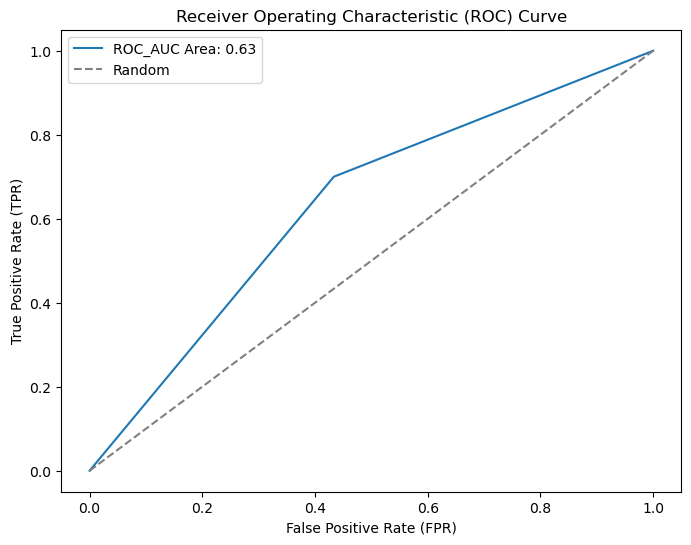

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC_AUC Area: {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In the graph shown above, this visually shows the precision and accuracy of the score above. What we can see here is that the curve is low, indicating that the performance of the model is not as good as the group anticipated. Though that doesn't imply that the model wasn't able to predict the values given, however, as the point stands, the precision and accuracy of the model's prediction with logistic regression is significantly not preferable as it does not yield to giving accurate results on the predictions well. 

In [45]:
#Make predictions on the models using new instance
def pred_NewInstance():
    y_predict = knn.predict([[40000, 18]]) #predict given new instance for knn
    print("Predicted Position: ",y_predict)
    x_predict = reg.predict([[38, 34, 45, 55, 3.3]]) #predict given new instance for linear
    print("Predicted Salary Value: ", x_predict)
    z_predict = model.predict([[34, 45, 55]]) #predict given new instance for linear
    print("Predicted Gender: ", z_predict) # 0 indicates female while 1 indicates male

pred_NewInstance()

Predicted Position:  ['Manager']
Predicted Salary Value:  [953103.63127589]
Predicted Gender:  [0]


In here, we can see that the models shown (this is for KNN and Linear Regression) were both able to predict a new instance, where the predicted position is a 'Junior Developer', with the predicted salary $ 953103.63, and that this employee is a female.

### 📈 Classification Model Evaluations

In [46]:
#function for model evaluation
def knn_model():
  print(f'Knn train score: ', knn.score(X_train_scaled, knn_y_train))
  print(f'Knn test score: ', knn.score(X_test_scaled, knn_y_test))
  print(f'Knn model accuracy: ', accuracy_score(knn_y_test, knn_pred))

def logi_model():
  print(f'Logistic train score: ', model.score(logX_train, log_y_train))
  print(f'Logistic test score: ', model.score(logX_test, log_y_test))
  print(f'Logistic model accuracy: ', accuracy_score(log_y_test, log_pred))

knn_model()
logi_model()

Knn train score:  1.0
Knn test score:  0.85
Knn model accuracy:  0.85
Logistic train score:  0.6142857142857143
Logistic test score:  0.6333333333333333
Logistic model accuracy:  0.6333333333333333


In this segment right, these are the results of train, test, model score, and model accuracy of two models: KNN and Logistic Regression
1. KNN Result
> We can see that the train score of the model is at 100%, implying that the score is good, however, when we look at the test result of the same model, it is less by 9%. Does this imply that the model is over-fitting? It is possible, since the accuracy of the test score is lesser compared to the train score, it could be over-fitting but this result is okay. The reason as to why the result is okay, despite it being over-fitting is due to the fact that the scores are not that far from each other. Hence, making this a good result. The model score and model accuracy have the same result as the test score.
<br>
2. Logistic Regression Result
> The result of the model's train score is 61% and its test score is at 63%. Does this make this a good model? The results of the train and test scores are decent, but as the score of the model being 60% range, this will likely result in the model not being able to perform the predictions properly, as shown in the ROC-AUC Curve and Score. The results of the model score and the model accuracy is the same as the test score result. 

In [47]:
def naive_model():
  print(f'Naive Bayes train score: ', nb_model.score(knnX_train, knn_y_train))
  print(f'Naive Bayes test score: ', nb_model.score(knnX_test, knn_y_test))
  print(f'Naive Bayes model accuracy: ', accuracy_score(knn_y_test, nb_pred))

def svm_model():
  print(f'SVM train score: ', svm.score(X_train, y_train))
  print(f'SVM test score: ', svm.score(X_test, y_test))
  print(f'SVM model accuracy: ', accuracy_score(y_test, svm_pred))
    
naive_model()
svm_model()

Naive Bayes train score:  0.9214285714285714
Naive Bayes test score:  0.9333333333333333
Naive Bayes model accuracy:  0.9333333333333333
SVM train score:  0.7357142857142858
SVM test score:  0.5666666666666667
SVM model accuracy:  0.5666666666666667


3. Naive Bayes Result
> The train result of Naive Bayes model is 92% and the test score of the same model is 93%. This implies that the model has a very good yield on predicting values of the dataset accurately and precisely. The model score and the model accuracy are the same as the test score of the model.
<br>
4. SVM Result
> This is a good case, where the model is over-fitting. As we can see here, the train score of the model is 73%, however, the result of the model's test score, went down by 17%. This implies that the model wasn't able to predict hidden values correctly unlike when the values are shown to the model. This model does not have good performance. The model score and the model accuracy is the same as the test result of the model.

### 📈 Classification Model Evaluations

In [48]:
def Linear_model():
  print(f'Linear train score: ', reg.score(linX_train, lin_y_train))
  print(f'Linear test score: ', reg.score(linX_train, lin_y_train))
  print(f'Linear model score: ', reg.score(linX_test, lin_y_test))

Linear_model()

Linear train score:  0.8452027389342002
Linear test score:  0.8452027389342002
Linear model score:  0.8034763052082582


5. Linear Regression Result
> The test and train score of the model is equal to each other, 84%. Implying that the model does incredibly well on both training and testing, it's very well-balanced. However, when we look at the model score, it dropped down by 4%. It wasn't able to predict new instances properly but nonetheless this model still have good performance on predicting hidden values.

***Mean Absolute Error (MAE)*** MAE is the average of the absolute differences between the predicted and actual values. It provides a measure of the average magnitude of errors.

***The Mean Squared Error (MSE)*** represents the average squared difference between the observed actual values and the values predicted by the model.

***The R-squared (R2)*** score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [49]:
#metric results for linear regression model

mae = metrics.mean_absolute_error(lin_y_test, lin_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(lin_y_test, lin_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(lin_y_test, lin_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error: 9033.932603342959
Mean Squared Error: 131745232.54595195
R-squared (R2) Score: 0.8034763052082582


### 📈 Evaluate Model Performance

* True Positive (TP): Instances that are actually positive and predicted as positive.
* True Negative (TN): Instances that are actually negative and predicted as negative.
* False Positive (FP): Instances that are actually negative but predicted as positive.
* False Negative (FN): Instances that are actually positive but predicted as negative.

 `|                 | Predicted Pos 1    | Predicted Pos 2    | Predicted Pos N    |` </br>
 `| Actual Pos 1    | Pos 1, 1           | Pos 1, 2           | Pos 1, N           |` </br>
 `| Actual Pos 2    | Pos 2, 1           | Pos 2, 2           | Pos 2, N           |` </br>

In [50]:
#confusion matrix for knn model
print(f'Knn model confusion matrix: \n', confusion_matrix(knn_y_test, knn_pred))

#confusion matrix for Logistic model
print(f'\nLogistic model confusion matrix: \n', confusion_matrix(log_y_test, log_pred))

Knn model confusion matrix: 
 [[ 6  0  1  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0  0  6  0  2]
 [ 1  0  0  0 10  0]
 [ 0  0  0  3  2  8]]

Logistic model confusion matrix: 
 [[17 13]
 [ 9 21]]


Logistic Regression Confusion Matrix </br>
 `|                 | Predicted Positive | Predicted Negative |` </br>
 `| Actual Positive | True Posivite: 17  | False Positive: 13 |` </br>
 `| Actual Negative | False Negative: 9  | True Negative: 21  |` </br>

1. KNN Confusion Matrix
> As we can see here, the confusion matrix for KNN shows a prediction of which entry would likely pick a position. 7% would likely chose Analysts, 8% would likely be an Intern, 13% would get Junior Developer, 7% are Managers, 11% would likely be Senior Developer, and lastly 3% would likely get the position of Team Lead.
2. Logistic Regression Matrix
> This confusion matrix is to see whether the model was able to predict correctly positive and negative values, as we can see here the model was able to accurately predict true negative values 17% of the time and was able to predict true negative 21%. This is decent as it was able to predict the values correctly frequently, as it is shown that the false positive and false negative values are slightly lower (9%- False Negative, 13% as False Positive) than the true positive and negative values. However, this does not change the fact that the model was somewhat an unfit model for this particular dataset.

**Precision:**

Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions made by the model.</br>
`precision = true_positives / (true_positives + false_positives)`

**Recall (Sensitivity or True Positive Rate):**
Recall is the ratio of true positive predictions to the total actual positives. It measures the ability of the model to capture all the positive instances.</br>
`recall = true_positives / (true_positives + false_negatives)`

**F1-score:**
The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when there is an uneven class distribution. </br>
`f1_score = 2 * (precision * recall) / (precision + recall)`

**Support:**
Support is the number of actual occurrences of each class in the specified dataset. It is the number of true instances for each class.

In [51]:
#check classification report for each models
print(classification_report(knn_y_test, nb_pred)) #nb model

                  precision    recall  f1-score   support

         Analyst       1.00      0.86      0.92         7
          Intern       1.00      1.00      1.00         8
Junior Developer       0.93      1.00      0.96        13
         Manager       0.89      1.00      0.94         8
Senior Developer       0.85      1.00      0.92        11
       Team Lead       1.00      0.77      0.87        13

        accuracy                           0.93        60
       macro avg       0.94      0.94      0.94        60
    weighted avg       0.94      0.93      0.93        60



In [22]:
#check classification report for each models
print(classification_report(knn_y_test, knn_pred)) #knn model
print(classification_report(log_y_test, log_pred)) #logistic model

                  precision    recall  f1-score   support

         Analyst       0.86      0.86      0.86         7
          Intern       1.00      1.00      1.00         8
Junior Developer       0.93      1.00      0.96        13
         Manager       0.67      0.75      0.71         8
Senior Developer       0.83      0.91      0.87        11
       Team Lead       0.80      0.62      0.70        13

        accuracy                           0.85        60
       macro avg       0.85      0.86      0.85        60
    weighted avg       0.85      0.85      0.85        60

              precision    recall  f1-score   support

           0       0.65      0.57      0.61        30
           1       0.62      0.70      0.66        30

    accuracy                           0.63        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.63      0.63        60



This is a classification report on the KNN model and the logistic model. We can see a drastic difference between the performance of each models. We can see for KNN, the result of precision, recall, f1-score, accuracy, macro average, and weighted average are significantly higher and have better performance than that of Logistic Regression model. After analyzing the two models on previous results, this shows that the KNN is indeed one of the many models that can perform well on this dataset.

### 📈  Evaluate the model's performance using k-fold cross validation.

In [23]:
models = [model, clf, knn, reg, nb_model, svm]

In [24]:
Xtest_sets = [logX_test, deci_X, knnX_test, linX_test, knnX_test, X_test]
y_test_sets = [log_y_test, deci_y, knn_y_test, lin_y_test, knn_y_test, y_test]

In [25]:
kfold = KFold(n_splits=6, shuffle=True, random_state=42)

In [26]:
for i in models:
  results = cross_val_score(i, Xtest_sets[models.index(i)], y_test_sets[models.index(i)], cv=kfold)
  print(i.__class__.__name__)
  print()
  print("Average Accuracy: %.2f%%" % (results.mean() * 100) )
  print('---------------------------------------------------')

LogisticRegression

Average Accuracy: 55.00%
---------------------------------------------------
DecisionTreeClassifier

Average Accuracy: 53.10%
---------------------------------------------------
KNeighborsClassifier

Average Accuracy: 85.00%
---------------------------------------------------
LinearRegression

Average Accuracy: 65.73%
---------------------------------------------------
GaussianNB

Average Accuracy: 91.67%
---------------------------------------------------
SVC

Average Accuracy: 40.00%
---------------------------------------------------


This is the results of checking each model's accuracy, doing a k-fold cross-validation on the dataset. As we can see here, the group used 6 models, they are: KNN, Decision Tree, Naive Bayes, Logistic Regression, GaussianNB, and SVC. We can see which model performs well on the k-fold cross validation, the first three models that were able to perform well are: GaussianNB, KNN, and Linear Regression. While the ones that weren't able to perform well are the following: Logistic Regression, Decision Tree, and SVC.

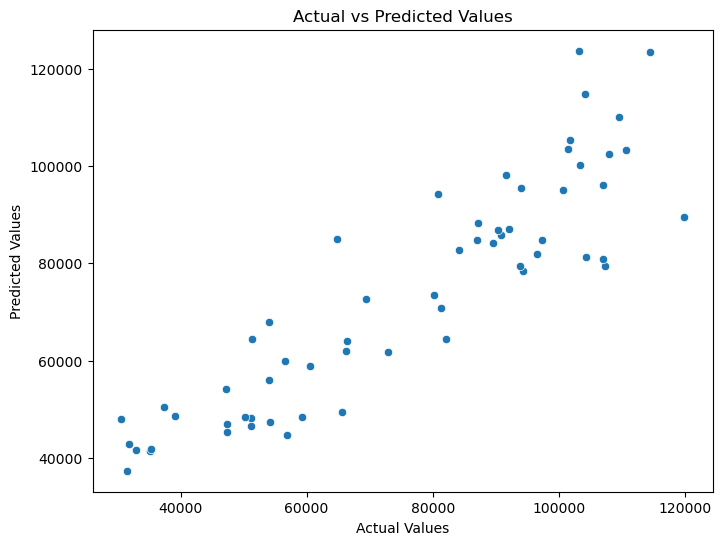

In [291]:
#y_actual and y_pred are your actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lin_y_test, y=lin_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

This graph shown above shows whether or not there is a form of strong or weak correlation between the values being predicted vs its actual values. As it can be seen here, there is a positive correlation with one another, but no clear indicator whether there is a strong correlation or a weak correlation; The strength of the correlation seems to be decent as they are not too far from each nor to close to one another.

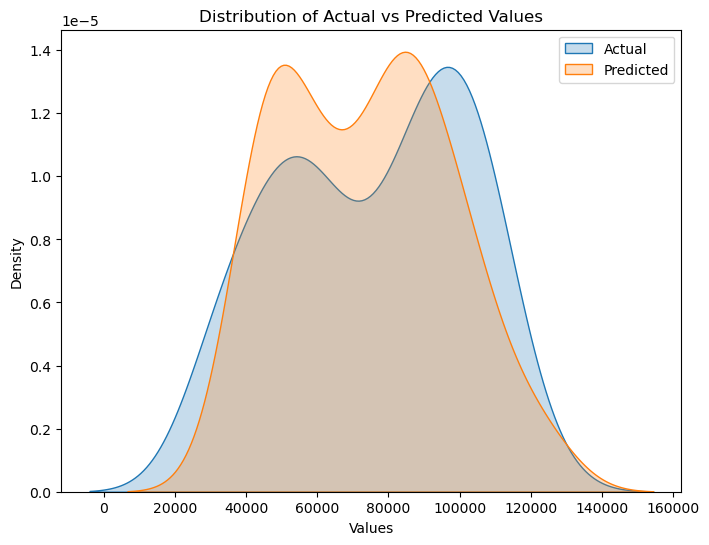

In [292]:
#Distribution plot
plt.figure(figsize=(8, 6))
sns.kdeplot(lin_y_test, label='Actual', fill=True)
sns.kdeplot(lin_pred, label='Predicted', fill=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()

This graph shows how the predicted values and the actual predicted values are not far off from each other. Implying that the predictive model was able to predict values, whether it's a new instances or a hidden values, correctly.

# Conclusion

In conclusion, the group selected top 3 models that performed well, those models are: KNN, Naive Bayes, and Linear Regression. The reason as to why the group selected these models is due to how well they were able to predict values without compromising the original dataset. Their predictions are significantly high in performance compared to other models, making them the appropriate models to use  due to the nature of the dataset, the underlying relationships between each features, and were able to accomplish specific goals the group wants to find out. To add, the group tried applying data curing on the multicollinearity found, implementing the z-score and iqr method, as well as scaling the dataset to gain better model score performance. Combining the strengths of Linear Regression for linear relationships, Naive Bayes for categorical and text data, and KNN for capturing intricate patterns provides a comprehensive approach to the dataset. Moreover, ensemble methods or hybrid models could be explored to further enhance predictive performance and robustness across different data scenarios.